In [23]:
import numpy as np
import pandas as pd
import glob

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

import bokeh
import bokeh.plotting
from bokeh.plotting import ColumnDataSource
from bokeh.models import LabelSet
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [31]:
#Glob together all csvs with the deeplabcut generated position data. 
#The deeplabcut data lists the network iteration of the trained network at the end of the filename
#This value will always be a multiple of 1000
file_list=glob.glob('./*/*000.csv')
well_list=glob.glob('./*/*Well_Positions.csv')

In [32]:
file_list[:10]

['./191025/191025_DCHC_transfer_experiment_S_well_3DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_7DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_8DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_6DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_2DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_4DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_1DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuffle1_80000.csv',
 './191025/191025_DCHC_transfer_experiment_S_well_5DeepCut_resnet50_DCHC_transfer_analysis_20191012_SOct21shuff

In [33]:
well_list

['./Well_positions/191025_DCHC_transfer_experiment_S_Well_Positions.csv',
 './Well_positions/191029_DCHC_transfer_experiment_D_Well_Positions.csv',
 './Well_positions/191008_DCHC_transfer_experiment_P_Well_Positions.csv',
 './Well_positions/191021_DCHC_transfer_experiment_SP_Well_Positions.csv',
 './Well_positions/191003_DCHC_transfer_experiment_SP_Well_Positions.csv',
 './Well_positions/191113_DCHC_transfer_experiment_P_Well_Positions.csv',
 './Well_positions/191105_DCHC_transfer_experiment_D_Well_Positions.csv',
 './Well_positions/191020_DCHC_transfer_experiment_S_Well_Positions.csv',
 './Well_positions/191115_DCHC_transfer_experiment_D_Well_Positions.csv',
 './Well_positions/191019_DCHC_transfer_experiment_S_Well_Positions.csv',
 './Well_positions/190919_DCHC_transfer_experiment_S_Well_Positions.csv',
 './Well_positions/191012_DCHC_transfer_experiment_SP_Well_Positions.csv',
 './Well_positions/191016_DCHC_transfer_experiment_P_Well_Positions.csv',
 './Well_positions/191022_DCHC_tran

In [34]:
for i,name in tqdm(enumerate(well_list)):
    #load each csv as a dataframe and append to the end of one large dataframe
    if i == 0:
        well_df=pd.read_csv(name,comment='#')
    else:
        well_df=well_df.append(pd.read_csv(name,comment='#'))

14it [00:00, 129.48it/s]


In [35]:
well_df

,,X,Y,WellNum,Date
0,1,535,254,1,191025
1,2,369,536,1,191025
2,3,212,255,1,191025
3,4,529,260,2,191025
4,5,363,543,2,191025
5,6,201,259,2,191025
6,7,523,274,3,191025
7,8,363,553,3,191025
8,9,198,265,3,191025
9,10,532,268,4,191025


In [45]:
#create dataframe for metadata
metadata=pd.DataFrame(columns=['well number','species','collection date','file path'])
#list to contain all position dataframes
df_list=[]
for i,name in tqdm(enumerate(file_list)):
    #load each csv as a dataframe into a list
    df_list.append(pd.read_csv(name,header=[1,2]))
    
    #pull metadata out of the filenames (Species identifier, collection date, well number)
    metadata = metadata.append({'species':name[name.rfind('_',0,name.rfind('_'))+1], 
                        'collection date':name[name.find('/')+1:name.find('/')+7],
                        'well number':name[name.find('well')+5:name.find('well')+6],
                        'file path' : name}, 
                     ignore_index=True)

#creating columns for the ant length information
metadata['length lower']=''
metadata['length upper']=''

109it [00:22,  5.28it/s]


In [46]:
#loop through the each dataframe and create a new column named antlength
#antlength is the length of the ant calculated from the head and gaster position data
for i,df in tqdm(enumerate(df_list)):
    df['antlength'] = np.sqrt((df['anthead']['x'] - df['antgaster']['x'])**2 + 
                           (df['anthead']['y'] - df['antgaster']['y'])**2)

109it [00:01, 88.98it/s]


In [47]:
#list all dates in the metadata file
np.unique(metadata['collection date'])

array(['190919', '191003', '191008', '191012', '191016', '191019',
       '191020', '191021', '191022', '191025', '191029', '191105',
       '191113', '191115'], dtype=object)

### In the next section the ant lengths from each experiment are plotted in order to determine an upper and lower bound for the length of the ant in each well

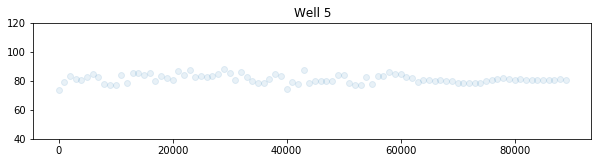

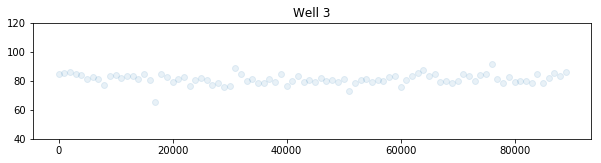

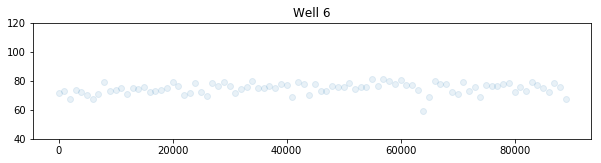

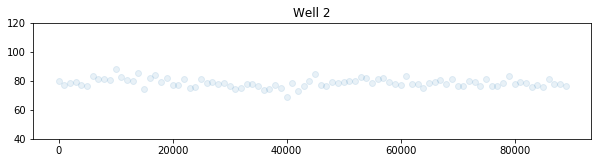

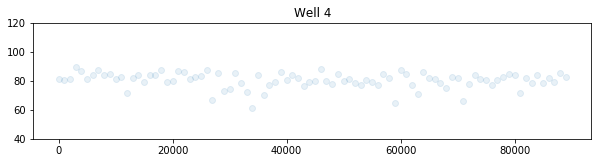

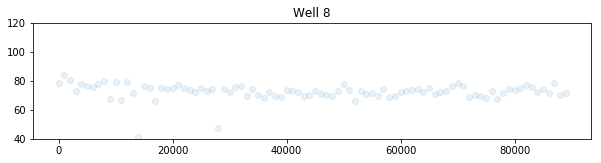

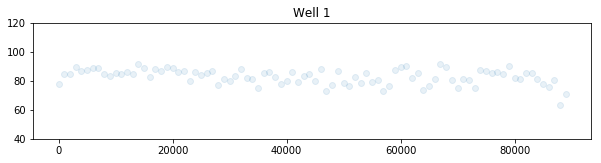

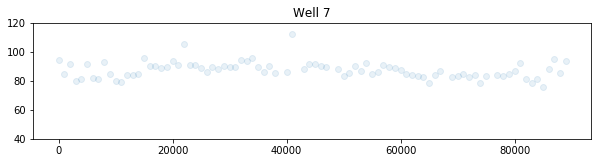

In [48]:
#count is used to specify the position of each subplot
count=0

#date specifies the date of the data collection to be analyzed
date='191105'

#loop through the indices of the rows from the ID dataframe. These indices should match
#up with the position of the corresponding dataframe in the dataframe list.
for i in metadata.loc[metadata['collection date']==date].index:
    df=df_list[i]
    subplt = int(str(len(metadata.loc[metadata['collection date']==date].index)) + '1' + str(count+1))
    plt.figure(figsize=(10,20))
    plt.subplot(subplt)
    plt.title('Well ' + metadata.iloc[i]['well number'])
    plt.scatter(df['bodyparts']['coords'][::1000],df['antlength'][::1000],alpha=0.1)
    plt.ylim([40,120])
    count = count+1

# Thought
Maybe don't need to have a lower bound. Isn't too big of an issue if either head or gaster is incorrectly labelled so long as it is closer to the other marker than what it should be

In [49]:
#metadata['length lower'].loc[metadata['collection date']=='190919'] = 40
metadata['length upper'].loc[metadata['collection date']=='190919'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191003'] = 40
metadata['length upper'].loc[metadata['collection date']=='191003'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191008'] = 30
metadata['length upper'].loc[metadata['collection date']=='191008'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191012'] = 30
metadata['length upper'].loc[metadata['collection date']=='191012'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191016'] = 30
metadata['length upper'].loc[metadata['collection date']=='191016'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191019'] = 30
metadata['length upper'].loc[metadata['collection date']=='191019'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191020'] = 30
metadata['length upper'].loc[metadata['collection date']=='191020'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191021'] = 30
metadata['length upper'].loc[metadata['collection date']=='191021'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191022'] = 30
metadata['length upper'].loc[metadata['collection date']=='191022'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191025'] = 30
metadata['length upper'].loc[metadata['collection date']=='191025'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191029'] = 45
metadata['length upper'].loc[metadata['collection date']=='191029'] = 125
#metadata['length lower'].loc[metadata['collection date']=='191105'] = 40
metadata['length upper'].loc[metadata['collection date']=='191105'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191113'] = 30
metadata['length upper'].loc[metadata['collection date']=='191113'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191115'] = 40
metadata['length upper'].loc[metadata['collection date']=='191115'] = 120

In [50]:
metadata.head()

,well number,species,collection date,file path,length lower,length upper
0,3,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110
1,7,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110
2,8,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110
3,6,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110
4,2,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110


In [51]:
for i,df in enumerate(df_list):
    #df['good frames'] = (df['antlength'] < metadata.iloc[i]['length upper']) & (df['antlength'] > metadata.iloc[i]['length lower'])  
    df['good frames'] = (df['antlength'] < metadata.iloc[i]['length upper'])  

In [52]:
for i,df in enumerate(df_list):
    avgLen = np.average(df['antlength'].loc[df['good frames']])
    df['touching'] = False

    df['head2head'] = np.sqrt((df['beetlehead']['x'] - df['anthead']['x'])**2 + 
                              (df['beetlehead']['y'] - df['anthead']['y'])**2)
        
    df['head2butt'] = np.sqrt((df['beetlehead']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetlehead']['y'] - df['antgaster']['y'])**2)
    
    if (metadata.iloc[i]['species'] == 'S') | (metadata.iloc[i]['species'] == 'D'):
        df['ellipse distance'] = df['head2head'] + df['head2butt']
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))
        
    if metadata.iloc[i]['species'] == 'P':
        df['butt2head'] = np.sqrt((df['beetleabdomen']['x'] - df['anthead']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['anthead']['y'])**2)
        
        df['butt2butt'] = np.sqrt((df['beetleabdomen']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['antgaster']['y'])**2)
    
        headEllipse=df['head2head'] + df['head2butt']
        buttEllipse=df['butt2head'] + df['butt2butt']
    
        df['ellipse distance'] = headEllipse*(headEllipse<buttEllipse) + buttEllipse*(buttEllipse<headEllipse)
    
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) \
                            | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))\
                            | ((df['butt2head']<avgLen) | (df['butt2butt']<avgLen))

In [53]:
sum(df_list[1]['touching'])

72524

In [54]:
metadata['touching percent']=''
for i,df in enumerate(df_list):
    metadata['touching percent'].iloc[i] = (sum(df['touching'])/len(df))

/Users/TomNaragon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


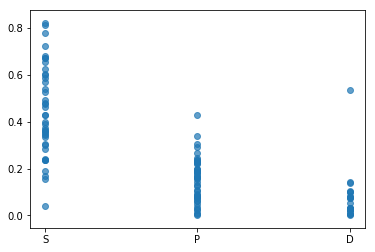

In [57]:
plt.scatter(metadata['species'],metadata['touching percent'],alpha=0.7)

In [59]:
metadata.head()

,well number,species,collection date,file path,length lower,length upper,touching percent
0,3,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110,0.777064
1,7,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110,0.809745
2,8,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110,0.818353
3,6,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110,0.427583
4,2,S,191025,./191025/191025_DCHC_transfer_experiment_S_wel...,,110,0.603736


In [75]:
metadata.to_csv(path_or_buf='~/Desktop/Parker_Research/DCHC_transfer_Experiment/Movement_metadata.csv')

In [60]:
well_df.head()

,,X,Y,WellNum,Date
0,1,535,254,1,191025
1,2,369,536,1,191025
2,3,212,255,1,191025
3,4,529,260,2,191025
4,5,363,543,2,191025


In [61]:
for i,df in enumerate(df_list):
    positions=well_df.loc[(well_df['Date'] == int(metadata['collection date'].iloc[i]))&(well_df['WellNum'] == int(metadata['well number'].iloc[i]))]
    positions = positions.append(positions.iloc[2]*0,ignore_index=True)
    #determine the distance between a label and the three antechamber entrance locations
    df['ant dist1']=np.sqrt((df['anthead']['x']-positions.iloc[0]['X'])**2 + (df['anthead']['y']-positions.iloc[0]['Y'])**2)
    df['ant dist2']=np.sqrt((df['anthead']['x']-positions.iloc[1]['X'])**2 + (df['anthead']['y']-positions.iloc[1]['Y'])**2)
    df['ant dist3']=np.sqrt((df['anthead']['x']-positions.iloc[2]['X'])**2 + (df['anthead']['y']-positions.iloc[2]['Y'])**2)

    df['beetle dist1']=np.sqrt((df['beetlehead']['x']-positions.iloc[0]['X'])**2 + (df['beetlehead']['y']-positions.iloc[0]['Y'])**2)
    df['beetle dist2']=np.sqrt((df['beetlehead']['x']-positions.iloc[1]['X'])**2 + (df['beetlehead']['y']-positions.iloc[1]['Y'])**2)
    df['beetle dist3']=np.sqrt((df['beetlehead']['x']-positions.iloc[2]['X'])**2 + (df['beetlehead']['y']-positions.iloc[2]['Y'])**2)

    #determine which of the three antechamber entrances is closest to the given point
    df['ant closest']=0*((df['ant dist1']<df['ant dist2'])&(df['ant dist1']<df['ant dist3'])) + \
                       1*((df['ant dist2']<df['ant dist1'])&(df['ant dist2']<df['ant dist3'])) + \
                       2*((df['ant dist3']<df['ant dist1'])&(df['ant dist3']<df['ant dist2']))

    df['beetle closest']=0*((df['beetle dist1']<df['beetle dist2'])&(df['beetle dist1']<df['beetle dist3'])) + \
                       1*((df['beetle dist2']<df['beetle dist1'])&(df['beetle dist2']<df['beetle dist3'])) + \
                       2*((df['beetle dist3']<df['beetle dist1'])&(df['beetle dist3']<df['beetle dist2']))

    #determine the equation of the circle circumscribing the central well of the arena using the three points marking the entrances to the antechamber
    #basing this off of Zaz's comment from https://math.stackexchange.com/questions/213658/get-the-equation-of-a-circle-when-given-3-points
    x=positions['X'][:3].values
    y=positions['Y'][:3].values
    ones=np.ones(3)
    xy=(positions['X'][:3]**2 + positions['Y'][:3]**2).values

    #creating the minors ofthe matrix of the system of equations
    M11=np.stack((x,y,ones),axis=1)
    M12=np.stack((xy,y,ones),axis=1)
    M13=np.stack((xy,x,ones),axis=1)
    M14=np.stack((xy,x,y),axis=1)

    #calculating the center of the circle as well as the radius
    x_0=1/2 * np.linalg.det(M12)/np.linalg.det(M11)
    y_0=-1/2 * np.linalg.det(M13)/np.linalg.det(M11)
    r=np.sqrt(x_0**2+y_0**2+(np.linalg.det(M14)/np.linalg.det(M11)))

    #determine if the ant and the beetle are inside or outside of the circle
    #plug in the position of the beetle into the left side of (x_0-x)**2 + (y_0-y)**2 < r**2
    #and determine if the value is smaller than than the right side
    df['ant in circle'] = np.sqrt((df['anthead']['x']-x_0)**2 + (df['anthead']['y']-y_0)**2) < r
    df['beetle in circle'] = np.sqrt((df['beetlehead']['x']-x_0)**2 + (df['beetlehead']['y']-y_0)**2) < r

    #creating columns for the location of the beetle and ant. If the beetle is in the center of the circle,
    #the location coding is 3, otherwise it is 0-3 starting in the bottom right chamber working counterclockwise
    df['ant loc'] = 3*df['ant in circle'] + (df['ant closest'] & ~df['ant in circle'])
    df['beetle loc'] = 3*df['beetle in circle'] + (df['beetle closest'] & ~df['beetle in circle'])
    
    #determining all of the possible distances that need to be measured
    #euclidean distance between the ant and the beetle
    euclidean_dist=df['head2head']

    #distance from the beetle to the nearest antechamber entrance
    beetle2beetleentrance=np.sqrt((df['beetlehead']['x']-positions['X'].iloc[df['beetle closest']].values)**2 + \
                                  (df['beetlehead']['y']-positions['Y'].iloc[df['beetle closest']].values)**2)

    #distance from the beetle to the antechamber entrance nearest the ant
    beetle2antentrance=np.sqrt((df['beetlehead']['x']-positions['X'].iloc[df['ant closest']].values)**2 + \
                               (df['beetlehead']['y']-positions['Y'].iloc[df['ant closest']].values)**2)

    #distance from the ant to the nearest antechamber entrance
    ant2antentrance=np.sqrt((df['anthead']['x']-positions['X'].iloc[df['ant closest']].values)**2 + \
                            (df['anthead']['y']-positions['Y'].iloc[df['ant closest']].values)**2)

    #distance from the ant to the antechamber entrance nearest the beetle
    ant2beetleentrance=np.sqrt((df['anthead']['x']-positions['X'].iloc[df['beetle closest']].values)**2 + \
                               (df['anthead']['y']-positions['Y'].iloc[df['beetle closest']].values)**2)

    #distance between the two antechamber entrances
    entrance2entrance=np.sqrt((positions['X'].iloc[df['ant closest']].values-positions['X'].iloc[df['beetle closest']].values)**2 + \
                              (positions['Y'].iloc[df['ant closest']].values-positions['Y'].iloc[df['beetle closest']].values)**2)
    
    df['actual distance'] = (df['ant loc']==df['beetle loc'])*euclidean_dist + \
                             (df['ant loc']!=df['beetle loc'])* \
                             ((df['ant loc']==3)*(ant2beetleentrance+beetle2beetleentrance) + \
                              (df['beetle loc']==3)*(beetle2antentrance+ant2antentrance) + \
                              ((df['ant loc']!=3)*(df['beetle loc']!=3))* \
                               (ant2antentrance+beetle2beetleentrance+entrance2entrance))

/Users/TomNaragon/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [62]:
df_list[0].head()

bodyparts     anthead                          antgaster              \
     coords           x           y likelihood           x           y   
0         0  437.261585  330.614778   0.999934  468.811513  395.031735   
1         1  436.699819  327.314187   0.999728  468.758625  395.350835   
2         2  436.376470  327.547922   0.999914  468.720074  395.371733   
3         3  435.860803  327.708748   0.999954  468.733006  395.314067   
4         4  435.688974  327.550628   0.999931  468.632135  395.401807   

              beetlehead                         ... beetle dist1  \
  likelihood           x           y likelihood  ...                
0        1.0  331.196232  300.311132   0.999995  ...   193.600003   
1        1.0  330.431497  298.720037   0.999999  ...   194.148677   
2        1.0  330.343599  298.656352   0.999999  ...   194.227764   
3        1.0  330.218510  298.620917   0.999999  ...   194.347350   
4        1.0  330.144849  298.615147   0.999999  ...   194.419687   

  beetle dist2 beetle dist3 ant closest beetle closest ant in circle  \
                                                                       
0   254.682437   137.797359           0              2          True   
1   256.357186   136.657024           0              2          True   
2   256.431534   136.556136           0              2          True   
3   256.482639   136.426173           0              2          True   
4   256.497787   136.353362           0              2          True   

  beetle in circle ant loc beetle loc actual distance  
                                                       
0             True       3          3      110.309428  
1             True       3          3      110.048088  
2             True       3          3      109.898555  
3             True       3          3      109.573700  
4             True       3          3      109.438679  

[5 rows x 29 columns]

In [63]:
def ecdf_func(x):
    return np.sort(x), np.arange(len(x))/len(x)

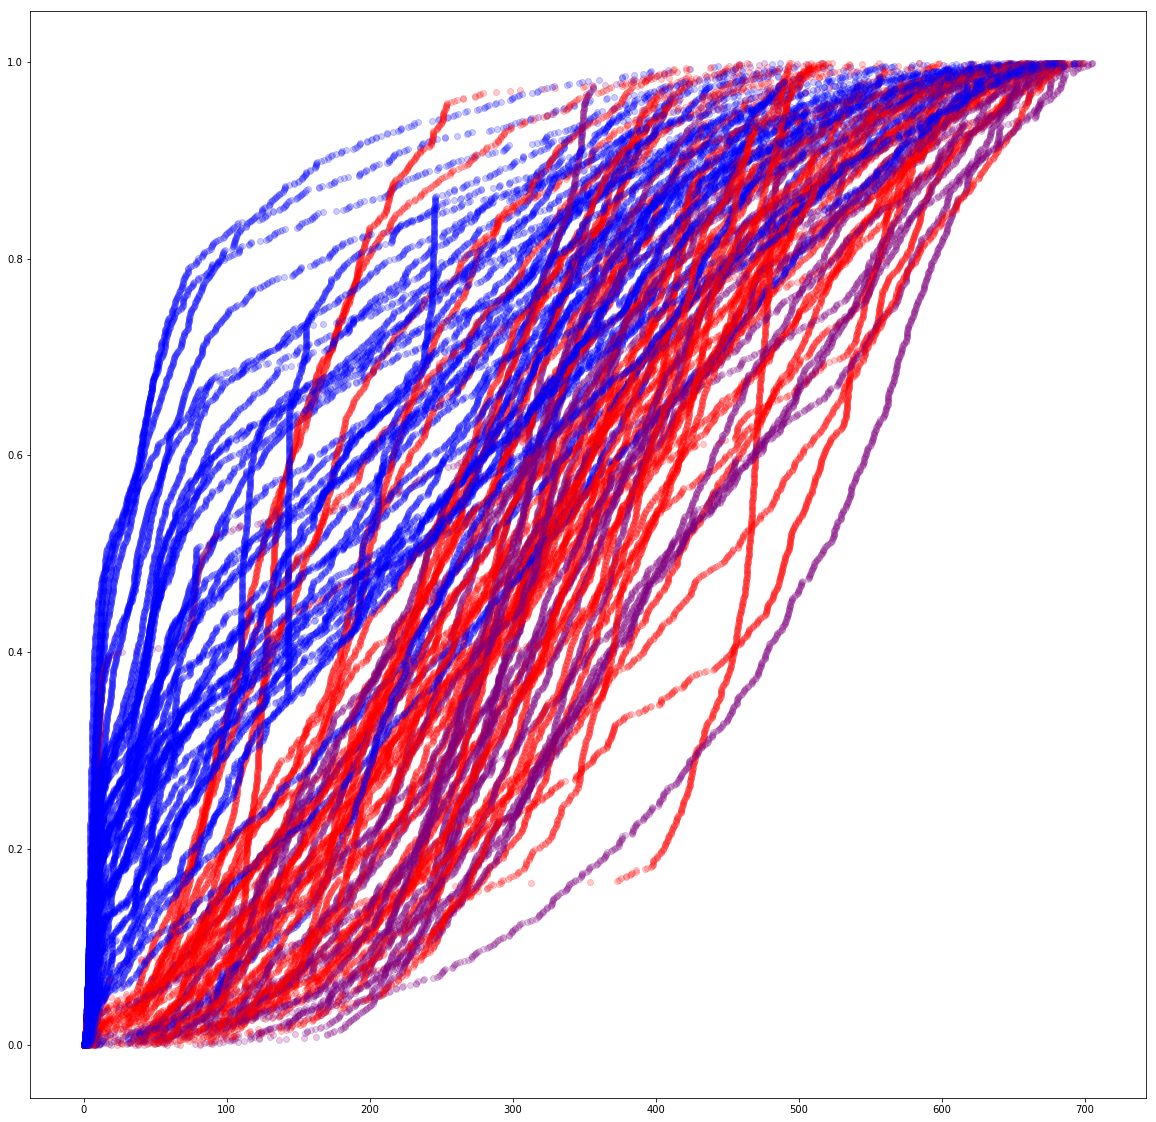

In [65]:
colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(20,20))
for i,df in enumerate(df_list): 
    if metadata['species'].iloc[i] == 'P':
        color='red'
    if metadata['species'].iloc[i] == 'S':
        color='blue'
    if metadata['species'].iloc[i] == 'D':
        color='purple'
        
    x_val,y_val=ecdf_func(df['head2head'][::100])
    
    plt.scatter(x_val,y_val,color=color,alpha=0.2)

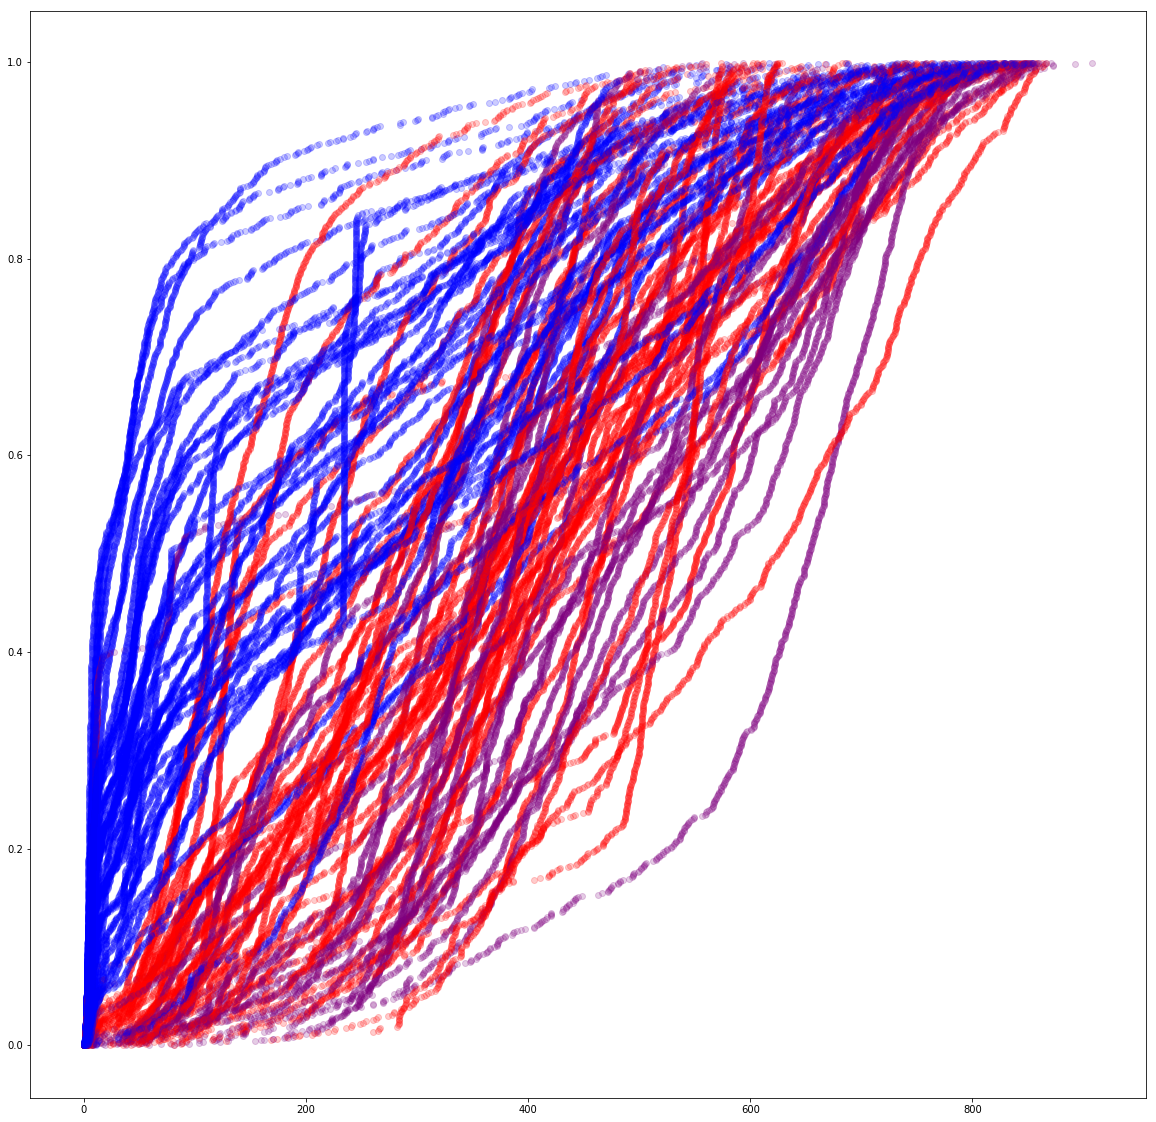

In [67]:
colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(20,20))
for i,df in enumerate(df_list): 
    if metadata['species'].iloc[i] == 'P':
        color='red'
    if metadata['species'].iloc[i] == 'S':
        color='blue'
    if metadata['species'].iloc[i] == 'D':
        color='purple'
        
    x_val,y_val=ecdf_func(df['actual distance'][::100])
    
    plt.scatter(x_val,y_val,color=color,alpha=0.2)

In [68]:
platy_set=[]
scepto_set=[]
dalotia_set=[]
for i,df in enumerate(df_list): 
    if metadata['species'].iloc[i] == 'P':
        platy_set = np.append(platy_set,df['actual distance'].values)
    if metadata['species'].iloc[i] == 'S':
        scepto_set = np.append(scepto_set,df['actual distance'].values)
    if metadata['species'].iloc[i] == 'D':
        dalotia_set = np.append(dalotia_set,df['actual distance'].values)

In [69]:
len(dalotia_set)

2042784

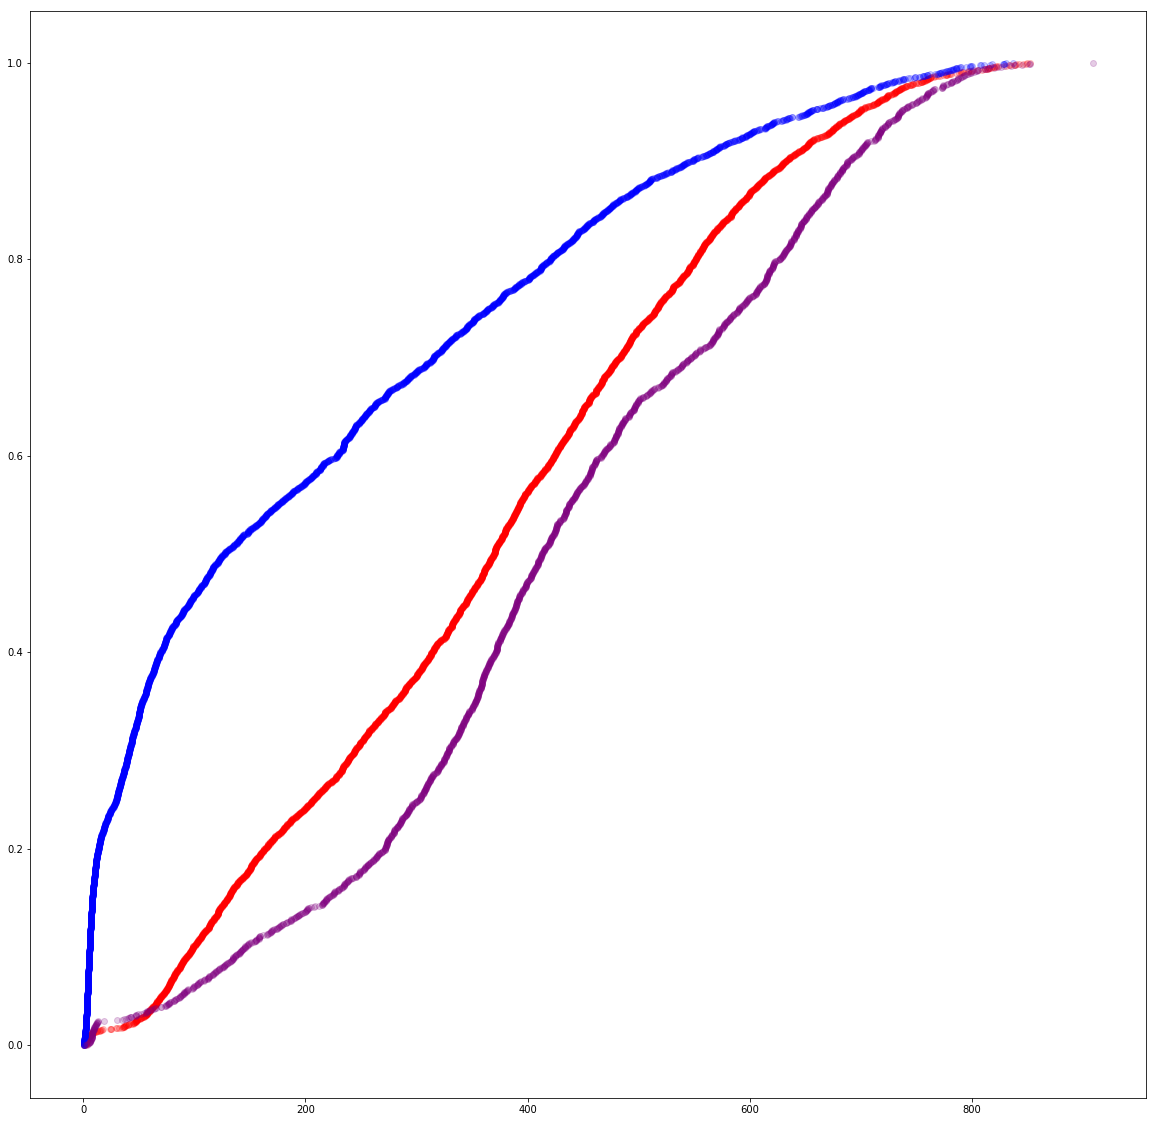

In [70]:
thinning=1000
plt.figure(figsize=(20,20))
x_platy,y_platy=ecdf_func(platy_set[::thinning])
x_scepto,y_scepto=ecdf_func(scepto_set[::thinning])
x_dalotia,y_dalotia=ecdf_func(dalotia_set[::thinning])
plt.scatter(x_platy,y_platy,color='red',alpha=0.2)
plt.scatter(x_scepto,y_scepto,color='blue',alpha=0.2)
plt.scatter(x_dalotia,y_dalotia,color='purple',alpha=0.2)